In [2]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


sentiment_wordcloud.png


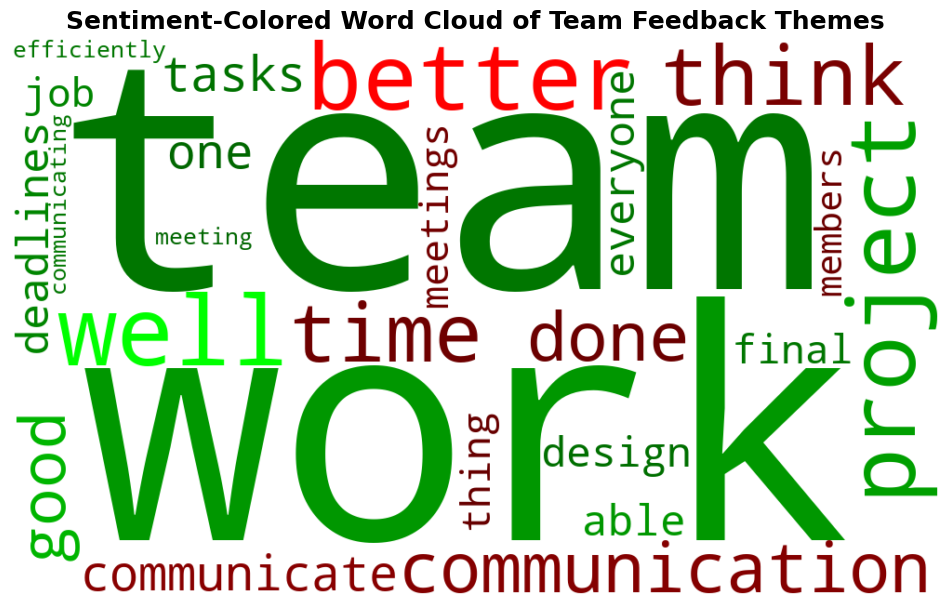

In [8]:
import pandas as pd
from collections import defaultdict
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# Data from the original input
data = {
    'DidWellMe': [
        "Our product was genuinely unique", "We did well on the coordination of timing when making the project",
        "Our team did really good in getting the prototype to work",
        "Some team members have been able to carry out the project way more than others",
        "Communication and splitting up of tasks.", "My team did well at communicating and meeting on time.",
        "I think we did a good job of meeting up and also splitting up the work from week to week.",
        "Our team met properly when we needed to and divided work such that all of us had a part to play.",
        "We did well when we split work between groups of two people. I think when we all meet its harder to evenly distribute the work load, but when tasks were assigned to smaller pairs we were able to work around busy schedules.",
        "No Response", "We completed the manufacturing in a timely manner.", "No Response", "No Response",
        "We completed our work on time and did a good job debugging out 3D printer",
        "I like how well we coordinated for the final presentation and how we divided up the the work for the deliverables.",
        "Worked well before deadlines! Stayed on top of the tasks at hand", "We are concrete about our goals.",
        "We worked hard",
        "I think when we were able to be all together we managed to delegate tasks effectively and we were all committed to finishing the best project possible at the end",
        "Good communication and consistently all meeting together for project work.", "No Response",
        "Transparence and keeping a positive mood.", "Everything is coming together", "No Response",
        "We did really good at finishing our final project efficiently",
        "I think when it came to the manufacturing and design review process of our group project, we did a goob job of stasying on task and staying ahead of deadlines. Everyone played their role whether it be manufacuring, assembly, or reporting on the project.",
        "communicate and resolve deadline issues", "We finished everything on time.",
        "We are able to push through to resolve any issues before major deadlines.", "No Response",
        "Our team was fairly good at distributing work among each other, communicating with one another, and consistently meeting up with one another.",
        "Communicating and meeting regularly", "Our team met deadlines and ensured we got everything done.",
        "We were able to meet our deadlines on time, and I wish to continue this.",
        "Our team made sure we got stuff done, even if last-minute",
        "meeting deadlines", "We are good problem solvers.",
        "Clear about design ideas and checking with each other", "Good design choices", "No Response",
        "We were very good at rapidly prototyping different versions of our product to test fits and make improvements as needed. We were also pretty good at dividing up the work fairly.",
        "We've distributed work well amongst ourselves and made sure that everyone has something to work on.",
        "We've done very well with making the best product we can, including multiple iterations and in-depth CAD work.",
        "We were able to communicate effectively and rapidly iterate on prototypes.",
        "We listen to each other's ideas and communicate effectively.",
        "We had good collaboration and a good work ethic", "We made a good hanger that actually worked.",
        "No Response", "No Response",
        "Communicating and working together", "No Response",
        "Drawings, working together on the video, prototyping quickly",
        "We stayed on top of our project timeline well, which is why we were able to get a working prototype of our project fairly early. We also work efficiently as a team during each of our meetings.",
        "We were able to finish our project on time.",
        "I think our prototype ended up working so thats one concrete thing that worked out",
        "We meet deadlines well.",
        "We did a good job of splitting up work so that it can get done in a timely manner.",
        "Everyone is responsive in the group chats.",
        "I like how we delegated tasks to people, so it wasn't just one person doing everything.",
        "When tasks are assigned to team members, they sincerely tried to finish it.",
        "Our team got all of our assignments done. s",
        "Our team did a really great job of creating a to-do list and allocating work to members so that things would be less stressful. I am really proud of how our group was able to effectively tackle the final weeks with the to-do list.",
        "Effort", "We meet before the final showcase and finish everything on time",
        "I think we were able to communicate our deadlines and follow through well",
        "One thing that our team did well was staying on top of deadlines even though everyone had a packed and busy schedule. We allocated tasks to each other really clearly and constantly gave each other feedback on things that we needed to re-do or add to something.",
        "I really enjoyed how casual and friendly our team was throughout the project's lifespan as it made it a lot easier to communicate and bounce off ideas amongst ourselves.",
        "We really did well iterating on our design when there was faults in our prototypes that we had to fix to make sure our final product was functional.",
        "Our team communicates tasks and gets them done.",
        "We got the final presentation done quickly and efficiently",
        "Our team had great communication in everything for the project, like deadlines, design choices, assignments and tasks, and was able to split the work as equally as possible between members so that everyone got to work on the project, and no one had too much work on their plate, allowing us to finish before every deadline, and end up with a finished product that everyone was happy with.",
        "We all contribute pretty willingly, and the group meetings go smoothly due to how well the group jives together.",
        "I think our team did a great job collaborating on the design of our final prototype, and everyone contributed positive ideas and suggestions during design discussions.",
        "We are communicating very well.",
        "Our team did an outstanding job iterating on our CAD model, and our FEA and GD&T work were well done. If anything, our team excelled on the design portion.",
        "We planned out the work we needed to do very well and each team member communicated effectively on what they needed to be able to get their assigned work done",
        "\"Our team did a great job iterating quickly through multiple CAD concepts and running FEA simulations to back our design decisions. This helped us stay efficient and focused under tight deadlines.\n\n\"",
        "Commitment", "Communicated between one another, grouped up when needed and delegated tasks effectively.",
        "No Response", "I think at the end it kinda came out well",
        "The team is doing well at showing up to meetings.", "No Response",
        "We were all very motivated to create a functional prototype. Almost everyone contributed equally and arrived on time and was present for the meetings.",
        "No Response",
        "I liked how we started early with our drawings and did multiple iterations to make them perfect.",
        "Join my project at the end because I finished the electronics.",
        "Team meetings were consistent and happened almost every week, which allowed for progress updates.",
        "Our team met every deadline properly.",
        "We did well with submitting stuff on time without relying on too many extensions.",
        "We did well splitting the work amongst each other.", "Our quality of work is of the highest degree!",
        "Our team worked efficiently to catch up on the project-- we evenly divided work and everyone got their parts done.",
        "I think our team did well in forming genuine friendships.",
        "we efficiently divided work and worked well together!", "Communication",
        "Communicating with each other more than 3 times a week and whenever a problem arose.",
        "We were able to communicate and cooperate towards the final goal!",
        "One thing that we did really well is that we split the tasks well, so each person had a good amount of work to do.",
        "No Response", "Quick Problem Solving", "We successfully finished producing our product.",
        "Efficiently getting the work done", "No Response", "No Response",
        "I think at this point in the project my team is doing a good job at trying to add value to the team. Unfortunately, there isn't much we can do right now other than manufacturing.",
        "I think that our team does a good job of allocating the work, and making sure that everyone knows what their goals are to maximize efficiency.",
        "Nothing.", "No Response", "We were really good at thinking on our feet.",
        "We were efficient when working.", "Workload is distributed well.",
        "We effectively segmented our overall build into submodules that could be worked together so that people could all contribute independently.",
        "Meeting to finish assembling.", "I think we were able to come together at the end very well",
        "Everyone was respectful, open minded, and understanding.",
        "Distribute work, divide and conquer on different parts/stages of project.", "meet deadlines",
        "Our team did well at executing on our goals and bonded well this week working towards the showcase.",
        "Split ourselves into subteams",
        "Smooth communication and have successful sessions to work on the project.",
        "We started a project and had a plan.",
        "One concrete thing that my team did well was using various manufacturing process for our project and be able to successfully created a joint armed phone-holder.",
        "spent time going to Jacobs, Etcheverry, etc. to manufacture parts and to have enough test prints.",
        "One thing my team did well is that we had clear communication and that is something that I would like us to continue as well.",
        "I like how we progress together", "more conversation", "Having clear communication channels",
        "Communication", "We were able to allocate work more efficiently in order to complete the project.",
        "All our team members have participated efficiently.",
        "We are good at communicating and distributing the work",
        "One concrete and specific thing our team did well was maintaining clear and consistent communication through regular check-ins, which kept everyone aligned and helped us meet deadlines efficiently. I would like to continue this practice moving forward.",
        "Collaborate", "We were all very clear in what we wanted to achieve with this project. Our goals were very aligned and so our direction was always the same.",
        "We worked well when we were all together. Just hard to get everyone togheger",
        "Making a plan for who does what", "Communicating more",
        "Our team did a good job with incorporating multiple manufacturing methods.",
        "We are good at following up with each other for updates.",
        "My team did well at splitting work amongst ourselves and supporting eachother when we needed it.",
        "We did a good job of coordinating time to work on the project and delegating tasks",
        "Communicated very well.", "No Response",
        "Setting our own deadlines and getting this large project finished in time.",
        "We stayed on schedule and finished the design and manufacturing stages of our project well. I would like to keep this up for the final stages of our project.",
        "I feel like we worked very well together, were all motivated to work on our project and executed on tasks assigned to each of us.",
        "Held good communication about how production has been going, finding work arounds and helping each other produce parts when necessary.",
        "No Response", "Dividing up tasks and completing work.",
        "Communicate and distribute work evenly", "Communicate Team Meetings",
        "I think that we communicated pretty well and kept the project on track.",
        "We communicated well I think. I love how some of my teammates are really caring and they would help as best as they can, which is very nice of them.",
        "Our team is really well in doing what needs to get done.",
        "One thing we did well was organize work and distribute it evenly",
        "I loved how our team effectively communicated our progress on a regular basis.",
        "One thing that we did extremely well was always communicating when either of us were not sure about something for our project.",
        "Our team did well in sectioning the tasks off into different teams of presentation, printing, drawing/technical.",
        "My team did well in problem solving when working with broken/missing Reprap printer parts and problematic final project designs",
        "We made certain design decisions that led to a faster manufacturing process, instead of debating and prolonging what needs to be done in order to have our prototype ready in time.",
        "We were able to figure out how to divide the workload for people who didn't have a Makerspace pass.",
        "We always communicated", "We did a good job at idea generation and listening to everyones opinions.",
        "Having great ideas to share all the time.", "No Response", "Meet deadlines",
        "Finished the project on time", "Communication, planning",
        "We split the final manufacturing work evenly and made sure it was all done on time.",
        "Split up work well between the members."
    ],
    'DoDiffMe': [
        "We could've been faster with prototyping",
        "Some team members were not as dedicated to the project so I wish they put in some more effort.",
        "Our team did really good in getting the prototype to work",
        "I would like our team to be better with communicating faster",
        "Everyone is able to work on different tasks to get it done, but more collaboration would be better",
        "We need to better evaluate ideas and not jump on the first thing we think of and go through the design process better.",
        "I would like for some members of the team to contribute more.",
        "I wish we would stay on top of deadlines a bit more.",
        "Our team met properly when we needed to and divided work such that all of us had a part to play.",
        "I would like our team to speak more freely about things we'd like to change and maybe give more input.",
        "We could do better at checking in with each other. Being in a team where everyone has varying commitments and levels of stress means we may need to split the work equitably instead of equally.",
        "No Response", "We could have maybe redesigned our prototype to use less parts.", "No Response",
        "No Response", "We have gotten bad about time management.",
        "I think we could meet more often on dead week so we can finish our presentation early and fix any part of our project if there's something wrong.",
        "We could plan our goals for meetings earlier",
        "We are not concrete about our gd&t drawings", "communicate",
        "when we set a meeting time I think we couldve met on time more rather than being so late",
        "Start manufacturing earlier lol", "No Response", "Time manage more efficiently.",
        "our build is lowkey complex", "No Response", "Maybe just communication",
        "At first there was a bit of miscommunication because one of our team memebers was not able to communicate through an app that we previously decided on, but that problem was solved quickly when we changed the app we were going to communicate on.",
        "get things done early", "We are done, but I want the team to communicate faster.",
        "Our team doesn't have anything that they need to do better.", "No Response",
        "Even with only four people it was difficult for everyone to have a task and something to do.",
        "I feel like we ironed out most kinks",
        "Something our team can do better is collaborate more effectively.",
        "Communicate more effectively, especially on tasks.", "Our team could communicate more timely",
        "communicate, distribute work well, increase quality of work.", "Do not procrastinate.",
        "Be more on top of things timeline wise", "Less procrastination", "No Response",
        "We could work on our time management, planning meetings more effectively so we don't leave parts of it to the last minute.",
        "Long term plan to build a buffer for deadlines and ensure we aren't doing this last minute would have been an area we could work on.",
        "I think we could do slightly better with communication as the end of the project rolls around.",
        "Improving work distribution and asking for help when it's needed.",
        "I think we could've done a better job at managing deadlines. However, we are currently on track.",
        "Get to lab section on time.", "make our hanger even better", "No Response", "No Response",
        "\"I don't know if theres anything I would change, maybe choose closer meeting locations but thats it \n\"",
        "No Response", "Figuring out how to properly do GD&T",
        "I don't think I have critique in what our team could do better, we listen to each other's ideas and execute tasks well, no need for improvement.",
        "Understand that if there is a group decision then we should stick to that.",
        "Some of the work like the presentation for example, while meeting the requirements to an acceptable extent, I thought could have been more creative and fun and utilized the opportunity of this project to have an excuse to make something awesome",
        "Many other teammates did not do their fair share of work.",
        "More of us should have been present for the actual manufacturing of the prototype.",
        "Show up earlier to meetings.",
        "I wish we used a different form of communication (ie. slack) because text messages proves to have several issues, from photos and pdfs not loading to just simply being hard to keep track of everything people are saying.",
        "Team members need to respect each other's time.",
        "I wish there was better work allocation and participation.",
        "I think our team could have done a better job at splitting up the jobs at the beginning of the project, instead of the final weeks.",
        "Communication", "Help with each other more",
        "I think we could have made a couple more iterations on the final design, and polish the tolerances more",
        "Similarly, one thing that I would've liked our team to have done differently was have more in-class collaboration time. Sometimes it felt as though a lot of the work was done behind-the-scenes or offline (out of class), and there was a lot of mismatch in my understanding of where we were.",
        "I think that something we could benefit from is a lot more meetings or responses to texts as it is vital to our team's progression.",
        "Maybe be more active individually so that everything could be completed much faster.",
        "Finish assignments a little earlier.",
        "We could have had more people do the manufacturing as it fell on one person",
        "I think our team could finish things earlier before the deadlines, since we ended up having to rush to finish part of the design because a problem came up in the last minute that we didn't expect and we had planned to finish right on time.",
        "Although we our meetings are fun, it can be hard to re-center.",
        "I think we could have done a better job of dispersing the workload among each other. Especially toward the end of the project, when we encountered challenges with the 3D printer and had to print our final prototype, we could have benefited from sharing the outstanding tasks more evenly.",
        "We can meet up more often.",
        "I think that our team could have done better on distributing work more to those who were working less.",
        "We should have planned the manufacturing farther in advance to account for errors out of our control.",
        "think we could improve our early-stage communicationâ€”especially around defining design constraintsâ€”so we don't spend time modeling ideas that turn out to be unfeasible or hard to manufacture.",
        "Scheduling.", "Sometimes we lack communication but overall it has been working out fine.",
        "No Response", "we could have better communication",
        "I would like our team to comunicate their progress on their portion of the work.", "No Response",
        "Communication and fairness in dividing work and having everyone contribute equally.", "No Response",
        "Our communication was not the best resulting in uneven workload where some had too much to do and others didn't have anything to do. I think transparency in workload and being able to define roles within the project earlier as discussed would have allowed everyone to make a significant contribution and set more manageable expectations for people.",
        "Trust me and work with me rather than design something that wouldn't work in the first place..",
        "Clearer communication and design choices would have been better to specify and agree upon.",
        "Our team could have regularly checked in with each member to understand how they were feeling about how our work was distributed.",
        "Communicate better and delegate better.", "We needed to be better about communicating more consistently",
        "Communicate better and stick to our plans.",
        "I would like my team to communicate better, as some team members didn't show up for meetings without any form of communication.",
        "I think our team could do better with organizing effective meetings.",
        "i think clarity of roles is necessary", "No Response", "Being on time to things",
        "I think overall communication could be a bit sharper.",
        "One thing that I would like our team to do better is to communicate better for integration purposes.",
        "No Response", "Communication", "We need more frequent and open communication.",
        "Delegating tasks more clearly.", "No Response", "No Response",
        "Something we all should have done differently is complete more jacob's and machine shop trainings earlier on in the semester. I think we could have also done a better job at trust our unexperienced members with more manufacturing responsibilities.",
        "Although this is a very small issue, one thing that I noticed is that some team members are not respecting the ideas or opinions of others, so I think that we can work to make this not grow into a larger issue.",
        "Showing up", "No Response", "communicate better", "We could have communicated much better.",
        "We need to have better communication about our skillsets and our availabilities (timewise).",
        "We struggled to keep everyone on schedule and failed to coordinate some of our union work to complete the project as timely as possible.",
        "Doing the report less last second.", "Communicate!",
        "Effectively delegate tasks, allocate roles, and improve communication on pertinent matters to ensure better coordination and productivity.",
        "Asking for help/ getting more people involved on a task when needed.", "communicate",
        "I would like communication to be a little better. This was partially my fault as I was working on some parts of the project without my phone near by and left my group members in the dark about my progress when we scheduled to check in with each other. One of our group mates also did not communicate that they would be out of town all week and we found this out on Monday/Tuesday.",
        "Work allocation could be much more equal", "Distribute tasks more evenly.",
        "We didnt follow through with the plan and haven't finished our project yet due to lack of efforts.",
        "One concrete thing that my team could do better was communicating more and making sure that everyone knows what they should do individually.",
        "I think we could have met more with the whole group, instead of just individual subteams.",
        "One thing that my team could improve is meeting efficiency and role allocation during meetings.",
        "More communication", "more conversation", "Be more clear when communicating",
        "Organizing meetings", "The project got a little bit rushed near the end, so we could have allocated more time earlier.",
        "Try improvising cooler ideas", "to do things more efficiently and sooner",
        "We should have divided the work more evenly between us.",
        "One concrete and specific thing I'd like our team to do better is to define roles and responsibilities more clearly at the start of each milestone, so that tasks are distributed more efficiently and accountability is improved.",
        "Timelines",
        "By the end the work got somewhat fragmented since we the iterative aspect of the project meant we couldn't be working together all the time.",
        "We could definitely communicate team tasks more and evaluate tasks based on what they are not how long they take.",
        "Take initiative more at the individual level", "Volunteer for work",
        "Our team should work on following through when we make commitments to doing work and meeting internal deadlines.",
        "We need to be better about time management and coming to sessions ON TIME.",
        "I wish we had more focus on this project and asked for help when we needed it.",
        "More photos of updates of progress!", "It's good as is", "No Response",
        "Perhaps start the design phase even earlier.",
        "I would like to improve communication on what has been accomplished and what still needs to be done",
        "Not really much other than maybe everyone being more involved in the design phase.",
        "I would like if some of them were more attentive to the final requirements and paid more mind to the GD&T.",
        "No Response", "Being more efficient during team meetings.", "Have better set deadlines",
        "Communicate well as we near closer to the due date.",
        "I wish the work distribution was done a little better.",
        "I love how most of us are very interactive and actually put time and effort into the project, but some team members need to put in more work.",
        "I would like for our team to have better communication overall.",
        "One thing we could have done better was keeping track of timelines because there were some things we forgot",
        "I wish we met up in person more often on a regular basis.",
        "One thing we could have done better was probably maybe meet a little more than usual.",
        "I would like my team to be better on being more efficient with our meeting times.",
        "My team should be more proactive and responsible when working on their tasks",
        "We just need to communicate our availability better, and divide costs and labor time more effectively and efficiently.",
        "We need better communication. I frequently ask questions in the group chat and no one will answer. We also need to better distribute the workload because right now it is put heavily on just two people.",
        "We should have been on time for a lot of things",
        "We can be more communicative and respectful of peoples strengths and weaknesses.",
        "Still being more communicative.", "No Response", "No Response",
        "Do the electronics sooner and test sooner", "Nothing",
        "We could have a more set schedule in terms of timeline for finishing the final stretch.",
        "Could have finished work earlier and get more testing done before final presentation."
    ]
}

# Combine all "good" and "bad" feedback into single strings
good_text = " ".join(filter(lambda x: x != "No Response", data['DidWellMe']))
bad_text = " ".join(filter(lambda x: x != "No Response", data['DoDiffMe']))

# Preprocess text: lowercase, remove punctuation, remove extra spaces
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

good_text = preprocess(good_text)
bad_text = preprocess(bad_text)

# Tokenize and count frequencies for each sentiment
good_words = good_text.split()
bad_words = bad_text.split()

good_counts = defaultdict(int)
for word in good_words:
    good_counts[word] += 1

bad_counts = defaultdict(int)
for word in bad_words:
    bad_counts[word] += 1

# Define stopwords to remove common, uninformative words
stopwords = set(WordCloud().stopwords)
additional_stopwords = {
    'team', 'we', 'our', 'i', 'a', 'to', 'and', 'the', 'of', 'in', 'on', 'with', 'for', 'was', 'were', 'had', 
    'this', 'that', 'but', 'is', 'it', 'at', 'an', 'my', 'me', 'us', 'all', 'from', 'also', 'as', 'by', 
    'do', 'did', 'good', 'well', 'better', 'more', 'think', 'things', 'could', 'would', 'should', 'get', 
    'got', 'made', 'make', 'so', 'just', 'be', 'been', 'can', 'one', 'no', 'response', 'not', 
    # New Aggressive Stopwords below:
    'able', 'come', 'coming', 'go', 'going', 'have', 'help', 'keep', 'put', 'need', 'needs', 'start', 'stay', 
    'use', 'take', 'really', 'very', 'much', 'enough', 'little', 'only', 'many', 'some', 'other', 'most', 
    'such', 'every', 'project', 'work', 'members', 'member', 'part', 'groups', 'tasks', 'task', 'process', 
    'assignments', 'assignment', 'section', 'up', 'off', 'out', 'lol', 'sincerely', 'way', 'sort'
}

# Calculate net sentiment for each word
word_sentiment = {}
for word in set(list(good_counts.keys()) + list(bad_counts.keys())):
    if word not in stopwords:
        net_score = good_counts[word] - bad_counts[word]
        word_sentiment[word] = net_score

# Prepare data for WordCloud: Word and its absolute frequency (size)
# and a custom color function based on net sentiment
word_frequencies = {}
for word, score in word_sentiment.items():
    # Use sum of good and bad counts for frequency (size of word)
    total_count = good_counts[word] + bad_counts[word]
    if total_count > 0: # Ensure we only include words that actually appeared
        word_frequencies[word] = total_count

# Define a custom color function
def sentiment_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    score = word_sentiment.get(word, 0) # Get the net sentiment score for the word
    if score > 0:
        # Green for positive sentiment (more in 'Did Well')
        # Darker green for higher positive score
        # Using a simple gradient: score/max_positive_score * 150 + 100 (for green channel)
        # Max green value will be 255. Min will be 100.
        max_positive_score = max([s for s in word_sentiment.values() if s > 0], default=1)
        green_intensity = int(100 + (score / max_positive_score) * 155) # Scale from 100-255
        return f"rgb(0, {green_intensity}, 0)"
    elif score < 0:
        # Red for negative sentiment (more in 'Do Differently')
        # Darker red for higher negative score (abs value)
        max_negative_score = abs(min([s for s in word_sentiment.values() if s < 0], default=-1))
        red_intensity = int(100 + (abs(score) / max_negative_score) * 155) # Scale from 100-255
        return f"rgb({red_intensity}, 0, 0)"
    else:
        # Grey for neutral sentiment (equal mentions or no sentiment data)
        return "rgb(150, 150, 150)"

# Generate the word cloud
wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color='white',
    stopwords=stopwords,
    min_font_size=10,
    max_words=25 # Limit to top 100 words for clarity
).generate_from_frequencies(word_frequencies)

# Apply the custom color function
wordcloud.recolor(color_func=sentiment_color_func)

# Display the generated image:
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Sentiment-Colored Word Cloud of Team Feedback Themes", fontsize=18, fontweight='bold')
plt.savefig('sentiment_wordcloud.png')
print("sentiment_wordcloud.png")